In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("Sales_data.csv")
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [9]:
df["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.tail().T

,8518,8519,8520,8521,8522
Item_Identifier,FDF22,FDS36,NCJ29,FDN46,DRG01
Item_Weight,6.865,8.38,10.6,7.21,14.8
Item_Fat_Content,Low Fat,Regular,Low Fat,Regular,Low Fat
Item_Visibility,0.056783,0.046982,0.035186,0.145221,0.044878
Item_Type,Snack Foods,Baking Goods,Health and Hygiene,Snack Foods,Soft Drinks
Item_MRP,214.5218,108.157,85.1224,103.1332,75.467
Outlet_Identifier,OUT013,OUT045,OUT035,OUT018,OUT046
Outlet_Establishment_Year,1987,2002,2004,2009,1997
Outlet_Size,High,NaN,Small,Medium,Small
Outlet_Location_Type,Tier 3,Tier 2,Tier 2,Tier 3,Tier 1


In [5]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
df["Item_Weight"].mean()

12.857645184136183

In [9]:
df["Item_Weight"].median()

12.6

In [10]:
df["Item_Weight"] = df["Item_Weight"].fillna(df["Item_Weight"].median())

In [11]:
df["Item_Weight"].isna().sum()

0

<AxesSubplot:xlabel='Item_Weight'>

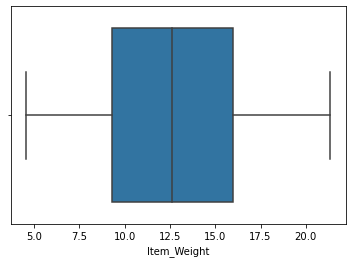

In [12]:
sns.boxplot(df["Item_Weight"])

In [13]:
df["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [14]:
df["Outlet_Size"].mode()

0    Medium
dtype: object

In [15]:
df["Outlet_Size"] = df["Outlet_Size"].fillna("Medium")

In [16]:
df["Outlet_Size"].isna().sum()

0

In [17]:
df["Outlet_Size"].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [19]:
df.drop("Item_Identifier",axis =1,inplace=True)

In [20]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,8513,8514,8515,8516,8517,8518,8519,8520,8521,8522
Item_Weight,9.3,5.92,17.5,19.2,8.93,10.395,13.65,12.6,16.2,19.2,...,12.0,15.0,20.7,18.6,20.75,6.865,8.38,10.6,7.21,14.8
Item_Fat_Content,Low Fat,Regular,Low Fat,Regular,Low Fat,Regular,Regular,Low Fat,Regular,Regular,...,Regular,Regular,Low Fat,Low Fat,reg,Low Fat,Regular,Low Fat,Regular,Low Fat
Item_Visibility,0.016047,0.019278,0.01676,0.0,0.0,0.0,0.012741,0.12747,0.016687,0.09445,...,0.020407,0.054489,0.021518,0.118661,0.083607,0.056783,0.046982,0.035186,0.145221,0.044878
Item_Type,Dairy,Soft Drinks,Meat,Fruits and Vegetables,Household,Baking Goods,Snack Foods,Snack Foods,Frozen Foods,Frozen Foods,...,Meat,Canned,Baking Goods,Others,Frozen Foods,Snack Foods,Baking Goods,Health and Hygiene,Snack Foods,Soft Drinks
Item_MRP,249.8092,48.2692,141.618,182.095,53.8614,51.4008,57.6588,107.7622,96.9726,187.8214,...,99.9042,57.5904,157.5288,58.7588,178.8318,214.5218,108.157,85.1224,103.1332,75.467
Outlet_Identifier,OUT049,OUT018,OUT049,OUT010,OUT013,OUT018,OUT013,OUT027,OUT045,OUT017,...,OUT035,OUT045,OUT018,OUT018,OUT046,OUT013,OUT045,OUT035,OUT018,OUT046
Outlet_Establishment_Year,1999,2009,1999,1998,1987,2009,1987,1985,2002,2007,...,2004,2002,2009,2009,1997,1987,2002,2004,2009,1997
Outlet_Size,Medium,Medium,Medium,Medium,High,Medium,High,Medium,Medium,Medium,...,Small,Medium,Medium,Medium,Small,High,Medium,Small,Medium,Small
Outlet_Location_Type,Tier 1,Tier 3,Tier 1,Tier 3,Tier 3,Tier 3,Tier 3,Tier 3,Tier 2,Tier 2,...,Tier 2,Tier 2,Tier 3,Tier 3,Tier 1,Tier 3,Tier 2,Tier 2,Tier 3,Tier 1
Outlet_Type,Supermarket Type1,Supermarket Type2,Supermarket Type1,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type1,Supermarket Type3,Supermarket Type1,Supermarket Type1,...,Supermarket Type1,Supermarket Type1,Supermarket Type2,Supermarket Type2,Supermarket Type1,Supermarket Type1,Supermarket Type1,Supermarket Type1,Supermarket Type2,Supermarket Type1


In [21]:
df["Item_Weight"]

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

<AxesSubplot:xlabel='Item_Weight'>

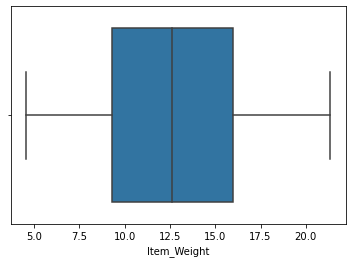

In [22]:
sns.boxplot(df["Item_Weight"])

In [23]:
df["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [24]:
df["Item_Fat_Content"].replace({"LF":"Low Fat","low fat":"Low Fat","reg":"Regular"},inplace=True)

In [25]:
df["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [26]:
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace({"Low Fat":0,"Regular":1})

In [27]:
df["Item_Fat_Content"].value_counts()

0    5517
1    3006
Name: Item_Fat_Content, dtype: int64

In [28]:
df["Item_Fat_Content"].dtype

dtype('int64')

<AxesSubplot:xlabel='Item_Visibility'>

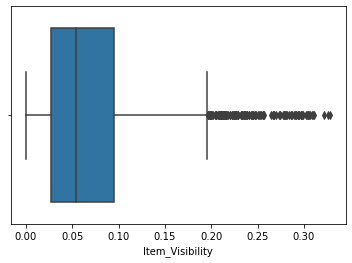

In [29]:
sns.boxplot(df["Item_Visibility"])

<AxesSubplot:xlabel='Item_Visibility'>

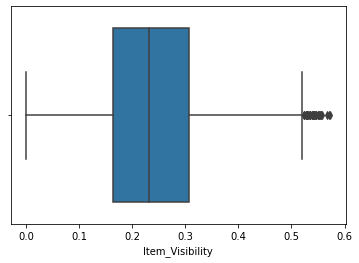

In [30]:
sns.boxplot(np.sqrt(df["Item_Visibility"]))

<AxesSubplot:xlabel='Item_Visibility'>

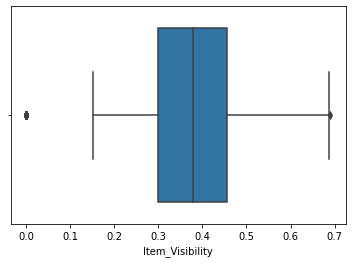

In [31]:
sns.boxplot(np.cbrt(df["Item_Visibility"]))

<AxesSubplot:xlabel='Item_Visibility'>

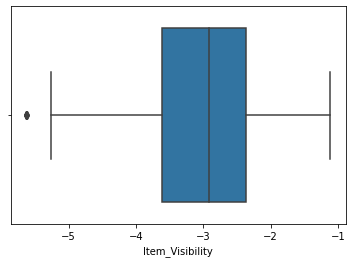

In [32]:
sns.boxplot(np.log(df["Item_Visibility"]))

In [33]:
np.cbrt(df["Item_Visibility"])

0       0.252232
1       0.268136
2       0.255913
3       0.000000
4       0.000000
          ...   
8518    0.384362
8519    0.360838
8520    0.327686
8521    0.525625
8522    0.355368
Name: Item_Visibility, Length: 8523, dtype: float64

In [34]:
df["Item_Visibility"] = np.cbrt(df["Item_Visibility"])

<AxesSubplot:xlabel='Item_Visibility'>

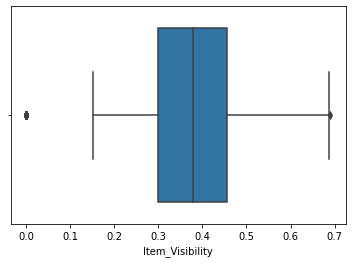

In [35]:
sns.boxplot(df["Item_Visibility"])

In [36]:
df["Item_Visibility"].describe()

count    8523.000000
mean        0.365716
std         0.133170
min         0.000000
25%         0.299961
50%         0.377815
75%         0.455625
max         0.689917
Name: Item_Visibility, dtype: float64

In [37]:
df["Item_Visibility"].min()

0.0

In [38]:
df["Item_Visibility"] = df["Item_Visibility"].replace({0.0:0.299961})

<AxesSubplot:xlabel='Item_Visibility'>

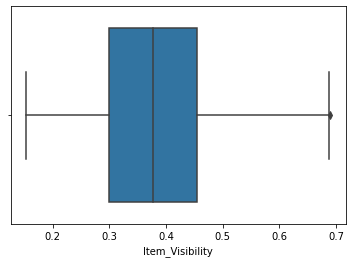

In [39]:
sns.boxplot(df["Item_Visibility"])

In [40]:
df["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [41]:
df["Item_Type"].nunique()

16

In [42]:
df2 = pd.get_dummies(df["Item_Type"],drop_first=True)
df2

,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8519,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8520,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8521,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [43]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,8513,8514,8515,8516,8517,8518,8519,8520,8521,8522
Item_Weight,9.3,5.92,17.5,19.2,8.93,10.395,13.65,12.6,16.2,19.2,...,12.0,15.0,20.7,18.6,20.75,6.865,8.38,10.6,7.21,14.8
Item_Fat_Content,0,1,0,1,0,1,1,0,1,1,...,1,1,0,0,1,0,1,0,1,0
Item_Visibility,0.252232,0.268136,0.255913,0.299961,0.299961,0.299961,0.233562,0.503272,0.255541,0.455407,...,0.273272,0.379113,0.278144,0.491402,0.437267,0.384362,0.360838,0.327686,0.525625,0.355368
Item_Type,Dairy,Soft Drinks,Meat,Fruits and Vegetables,Household,Baking Goods,Snack Foods,Snack Foods,Frozen Foods,Frozen Foods,...,Meat,Canned,Baking Goods,Others,Frozen Foods,Snack Foods,Baking Goods,Health and Hygiene,Snack Foods,Soft Drinks
Item_MRP,249.8092,48.2692,141.618,182.095,53.8614,51.4008,57.6588,107.7622,96.9726,187.8214,...,99.9042,57.5904,157.5288,58.7588,178.8318,214.5218,108.157,85.1224,103.1332,75.467
Outlet_Identifier,OUT049,OUT018,OUT049,OUT010,OUT013,OUT018,OUT013,OUT027,OUT045,OUT017,...,OUT035,OUT045,OUT018,OUT018,OUT046,OUT013,OUT045,OUT035,OUT018,OUT046
Outlet_Establishment_Year,1999,2009,1999,1998,1987,2009,1987,1985,2002,2007,...,2004,2002,2009,2009,1997,1987,2002,2004,2009,1997
Outlet_Size,Medium,Medium,Medium,Medium,High,Medium,High,Medium,Medium,Medium,...,Small,Medium,Medium,Medium,Small,High,Medium,Small,Medium,Small
Outlet_Location_Type,Tier 1,Tier 3,Tier 1,Tier 3,Tier 3,Tier 3,Tier 3,Tier 3,Tier 2,Tier 2,...,Tier 2,Tier 2,Tier 3,Tier 3,Tier 1,Tier 3,Tier 2,Tier 2,Tier 3,Tier 1
Outlet_Type,Supermarket Type1,Supermarket Type2,Supermarket Type1,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type1,Supermarket Type3,Supermarket Type1,Supermarket Type1,...,Supermarket Type1,Supermarket Type1,Supermarket Type2,Supermarket Type2,Supermarket Type1,Supermarket Type1,Supermarket Type1,Supermarket Type1,Supermarket Type2,Supermarket Type1


In [44]:
df = pd.concat([df,df2],axis = 1)

In [45]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,9.300,0,0.252232,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,...,0,0,0,0,0,0,0,0,0,0
1,5.920,1,0.268136,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,...,0,0,0,0,0,0,0,0,1,0
2,17.500,0,0.255913,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,...,0,0,0,0,1,0,0,0,0,0
3,19.200,1,0.299961,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,...,1,0,0,0,0,0,0,0,0,0
4,8.930,0,0.299961,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.384362,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,...,0,0,0,0,0,0,0,1,0,0
8519,8.380,1,0.360838,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,...,0,0,0,0,0,0,0,0,0,0
8520,10.600,0,0.327686,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,...,0,0,1,0,0,0,0,0,0,0
8521,7.210,1,0.525625,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,...,0,0,0,0,0,0,0,1,0,0


In [46]:
df.drop("Item_Type",axis=1,inplace=True)

In [47]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,8513,8514,8515,8516,8517,8518,8519,8520,8521,8522
Item_Weight,9.3,5.92,17.5,19.2,8.93,10.395,13.65,12.6,16.2,19.2,...,12.0,15.0,20.7,18.6,20.75,6.865,8.38,10.6,7.21,14.8
Item_Fat_Content,0,1,0,1,0,1,1,0,1,1,...,1,1,0,0,1,0,1,0,1,0
Item_Visibility,0.252232,0.268136,0.255913,0.299961,0.299961,0.299961,0.233562,0.503272,0.255541,0.455407,...,0.273272,0.379113,0.278144,0.491402,0.437267,0.384362,0.360838,0.327686,0.525625,0.355368
Item_MRP,249.8092,48.2692,141.618,182.095,53.8614,51.4008,57.6588,107.7622,96.9726,187.8214,...,99.9042,57.5904,157.5288,58.7588,178.8318,214.5218,108.157,85.1224,103.1332,75.467
Outlet_Identifier,OUT049,OUT018,OUT049,OUT010,OUT013,OUT018,OUT013,OUT027,OUT045,OUT017,...,OUT035,OUT045,OUT018,OUT018,OUT046,OUT013,OUT045,OUT035,OUT018,OUT046
Outlet_Establishment_Year,1999,2009,1999,1998,1987,2009,1987,1985,2002,2007,...,2004,2002,2009,2009,1997,1987,2002,2004,2009,1997
Outlet_Size,Medium,Medium,Medium,Medium,High,Medium,High,Medium,Medium,Medium,...,Small,Medium,Medium,Medium,Small,High,Medium,Small,Medium,Small
Outlet_Location_Type,Tier 1,Tier 3,Tier 1,Tier 3,Tier 3,Tier 3,Tier 3,Tier 3,Tier 2,Tier 2,...,Tier 2,Tier 2,Tier 3,Tier 3,Tier 1,Tier 3,Tier 2,Tier 2,Tier 3,Tier 1
Outlet_Type,Supermarket Type1,Supermarket Type2,Supermarket Type1,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type1,Supermarket Type3,Supermarket Type1,Supermarket Type1,...,Supermarket Type1,Supermarket Type1,Supermarket Type2,Supermarket Type2,Supermarket Type1,Supermarket Type1,Supermarket Type1,Supermarket Type1,Supermarket Type2,Supermarket Type1
Item_Outlet_Sales,3735.138,443.4228,2097.27,732.38,994.7052,556.6088,343.5528,4022.7636,1076.5986,4710.535,...,595.2252,468.7232,1571.288,858.882,3608.636,2778.3834,549.285,1193.1136,1845.5976,765.67


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   int64  
 2   Item_Visibility            8523 non-null   float64
 3   Item_MRP                   8523 non-null   float64
 4   Outlet_Identifier          8523 non-null   object 
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                8523 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
 10  Breads                     8523 non-null   uint8  
 11  Breakfast                  8523 non-null   uint8  
 12  Canned                     8523 non-null   uint8  
 13  Dairy                      8523 non-null   uint8

<AxesSubplot:xlabel='Item_MRP'>

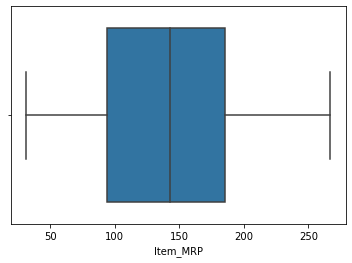

In [49]:
sns.boxplot(df["Item_MRP"])

In [50]:
df["Outlet_Identifier"].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [51]:
df3 = pd.get_dummies(df["Outlet_Identifier"])
df3

,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
8518,0,1,0,0,0,0,0,0,0,0
8519,0,0,0,0,0,0,0,1,0,0
8520,0,0,0,0,0,0,1,0,0,0
8521,0,0,0,1,0,0,0,0,0,0


In [52]:
df = pd.concat([df,df3],axis=1)

In [53]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,8513,8514,8515,8516,8517,8518,8519,8520,8521,8522
Item_Weight,9.3,5.92,17.5,19.2,8.93,10.395,13.65,12.6,16.2,19.2,...,12.0,15.0,20.7,18.6,20.75,6.865,8.38,10.6,7.21,14.8
Item_Fat_Content,0,1,0,1,0,1,1,0,1,1,...,1,1,0,0,1,0,1,0,1,0
Item_Visibility,0.252232,0.268136,0.255913,0.299961,0.299961,0.299961,0.233562,0.503272,0.255541,0.455407,...,0.273272,0.379113,0.278144,0.491402,0.437267,0.384362,0.360838,0.327686,0.525625,0.355368
Item_MRP,249.8092,48.2692,141.618,182.095,53.8614,51.4008,57.6588,107.7622,96.9726,187.8214,...,99.9042,57.5904,157.5288,58.7588,178.8318,214.5218,108.157,85.1224,103.1332,75.467
Outlet_Identifier,OUT049,OUT018,OUT049,OUT010,OUT013,OUT018,OUT013,OUT027,OUT045,OUT017,...,OUT035,OUT045,OUT018,OUT018,OUT046,OUT013,OUT045,OUT035,OUT018,OUT046
Outlet_Establishment_Year,1999,2009,1999,1998,1987,2009,1987,1985,2002,2007,...,2004,2002,2009,2009,1997,1987,2002,2004,2009,1997
Outlet_Size,Medium,Medium,Medium,Medium,High,Medium,High,Medium,Medium,Medium,...,Small,Medium,Medium,Medium,Small,High,Medium,Small,Medium,Small
Outlet_Location_Type,Tier 1,Tier 3,Tier 1,Tier 3,Tier 3,Tier 3,Tier 3,Tier 3,Tier 2,Tier 2,...,Tier 2,Tier 2,Tier 3,Tier 3,Tier 1,Tier 3,Tier 2,Tier 2,Tier 3,Tier 1
Outlet_Type,Supermarket Type1,Supermarket Type2,Supermarket Type1,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type1,Supermarket Type3,Supermarket Type1,Supermarket Type1,...,Supermarket Type1,Supermarket Type1,Supermarket Type2,Supermarket Type2,Supermarket Type1,Supermarket Type1,Supermarket Type1,Supermarket Type1,Supermarket Type2,Supermarket Type1
Item_Outlet_Sales,3735.138,443.4228,2097.27,732.38,994.7052,556.6088,343.5528,4022.7636,1076.5986,4710.535,...,595.2252,468.7232,1571.288,858.882,3608.636,2778.3834,549.285,1193.1136,1845.5976,765.67


In [54]:
df.drop("Outlet_Identifier",axis = 1,inplace = True)

In [55]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,8513,8514,8515,8516,8517,8518,8519,8520,8521,8522
Item_Weight,9.3,5.92,17.5,19.2,8.93,10.395,13.65,12.6,16.2,19.2,...,12.0,15.0,20.7,18.6,20.75,6.865,8.38,10.6,7.21,14.8
Item_Fat_Content,0,1,0,1,0,1,1,0,1,1,...,1,1,0,0,1,0,1,0,1,0
Item_Visibility,0.252232,0.268136,0.255913,0.299961,0.299961,0.299961,0.233562,0.503272,0.255541,0.455407,...,0.273272,0.379113,0.278144,0.491402,0.437267,0.384362,0.360838,0.327686,0.525625,0.355368
Item_MRP,249.8092,48.2692,141.618,182.095,53.8614,51.4008,57.6588,107.7622,96.9726,187.8214,...,99.9042,57.5904,157.5288,58.7588,178.8318,214.5218,108.157,85.1224,103.1332,75.467
Outlet_Establishment_Year,1999,2009,1999,1998,1987,2009,1987,1985,2002,2007,...,2004,2002,2009,2009,1997,1987,2002,2004,2009,1997
Outlet_Size,Medium,Medium,Medium,Medium,High,Medium,High,Medium,Medium,Medium,...,Small,Medium,Medium,Medium,Small,High,Medium,Small,Medium,Small
Outlet_Location_Type,Tier 1,Tier 3,Tier 1,Tier 3,Tier 3,Tier 3,Tier 3,Tier 3,Tier 2,Tier 2,...,Tier 2,Tier 2,Tier 3,Tier 3,Tier 1,Tier 3,Tier 2,Tier 2,Tier 3,Tier 1
Outlet_Type,Supermarket Type1,Supermarket Type2,Supermarket Type1,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type1,Supermarket Type3,Supermarket Type1,Supermarket Type1,...,Supermarket Type1,Supermarket Type1,Supermarket Type2,Supermarket Type2,Supermarket Type1,Supermarket Type1,Supermarket Type1,Supermarket Type1,Supermarket Type2,Supermarket Type1
Item_Outlet_Sales,3735.138,443.4228,2097.27,732.38,994.7052,556.6088,343.5528,4022.7636,1076.5986,4710.535,...,595.2252,468.7232,1571.288,858.882,3608.636,2778.3834,549.285,1193.1136,1845.5976,765.67
Breads,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
df["Outlet_Establishment_Year"].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [57]:
df["Outlet_Size"].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [58]:
df["Outlet_Size"] = df["Outlet_Size"].replace({"Small":0,"Medium":1,"High":2})

In [59]:
df["Outlet_Size"].value_counts()

1    5203
0    2388
2     932
Name: Outlet_Size, dtype: int64

In [60]:
df["Outlet_Location_Type"].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [61]:
df["Outlet_Location_Type"] = df["Outlet_Location_Type"].replace({"Tier 1":0,"Tier 2":1,"Tier 3":2})

In [62]:
df["Outlet_Location_Type"].value_counts()

2    3350
1    2785
0    2388
Name: Outlet_Location_Type, dtype: int64

In [63]:
df["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [64]:
df["Outlet_Type"] = df["Outlet_Type"].replace({"Grocery Store":0,"Supermarket Type1":1,"Supermarket Type2":2,"Supermarket Type3":3})

In [65]:
df["Outlet_Type"].value_counts()

1    5577
0    1083
3     935
2     928
Name: Outlet_Type, dtype: int64

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   int64  
 2   Item_Visibility            8523 non-null   float64
 3   Item_MRP                   8523 non-null   float64
 4   Outlet_Establishment_Year  8523 non-null   int64  
 5   Outlet_Size                8523 non-null   int64  
 6   Outlet_Location_Type       8523 non-null   int64  
 7   Outlet_Type                8523 non-null   int64  
 8   Item_Outlet_Sales          8523 non-null   float64
 9   Breads                     8523 non-null   uint8  
 10  Breakfast                  8523 non-null   uint8  
 11  Canned                     8523 non-null   uint8  
 12  Dairy                      8523 non-null   uint8  
 13  Frozen Foods               8523 non-null   uint8

### Feature Selection

In [67]:
x = df.drop("Item_Outlet_Sales",axis=1)


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Breads,Breakfast,...,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
0,9.300,0,0.252232,249.8092,1999,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,5.920,1,0.268136,48.2692,2009,1,2,2,0,0,...,0,0,0,1,0,0,0,0,0,0
2,17.500,0,0.255913,141.6180,1999,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,19.200,1,0.299961,182.0950,1998,1,2,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.930,0,0.299961,53.8614,1987,2,2,1,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.384362,214.5218,1987,2,2,1,0,0,...,0,1,0,0,0,0,0,0,0,0
8519,8.380,1,0.360838,108.1570,2002,1,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
8520,10.600,0,0.327686,85.1224,2004,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
8521,7.210,1,0.525625,103.1332,2009,1,2,2,0,0,...,0,0,0,1,0,0,0,0,0,0


In [90]:
x.T

,0,1,2,3,4,5,6,7,8,9,...,8513,8514,8515,8516,8517,8518,8519,8520,8521,8522
Item_Weight,9.300000,5.920000,17.500000,19.200000,8.930000,10.395000,13.650000,12.600000,16.200000,19.200000,...,12.000000,15.000000,20.700000,18.600000,20.750000,6.865000,8.380000,10.600000,7.210000,14.800000
Item_Fat_Content,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
Item_Visibility,0.252232,0.268136,0.255913,0.299961,0.299961,0.299961,0.233562,0.503272,0.255541,0.455407,...,0.273272,0.379113,0.278144,0.491402,0.437267,0.384362,0.360838,0.327686,0.525625,0.355368
Item_MRP,249.809200,48.269200,141.618000,182.095000,53.861400,51.400800,57.658800,107.762200,96.972600,187.821400,...,99.904200,57.590400,157.528800,58.758800,178.831800,214.521800,108.157000,85.122400,103.133200,75.467000
Outlet_Establishment_Year,1999.000000,2009.000000,1999.000000,1998.000000,1987.000000,2009.000000,1987.000000,1985.000000,2002.000000,2007.000000,...,2004.000000,2002.000000,2009.000000,2009.000000,1997.000000,1987.000000,2002.000000,2004.000000,2009.000000,1997.000000
Outlet_Size,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000
Outlet_Location_Type,0.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,2.000000,2.000000,0.000000,2.000000,1.000000,1.000000,2.000000,0.000000
Outlet_Type,1.000000,2.000000,1.000000,0.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,...,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000
Breads,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Breakfast,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [68]:
y = df["Item_Outlet_Sales"]
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

### Model Training

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [70]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)

In [71]:
lr_model = LinearRegression()

In [72]:
lr_model.fit(x_train,y_train)

LinearRegression()

### Model Evaluation

In [73]:
y_pred = lr_model.predict(x_test)
y_pred[0:5] # Y predicted

array([1365.27198976,  701.80871001,  875.36289018, 4227.93063883,
       3361.63301251])

In [74]:
y_test[0:5] # Y actual

7503    1743.0644
2957     356.8688
7031     377.5086
1084    5778.4782
856     2356.9320
Name: Item_Outlet_Sales, dtype: float64

### Model validation for test data

In [75]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [76]:
mse = mean_squared_error(y_test,y_pred)
print("Mean squared error is: ",mse)

Mean squared error is:  1144185.5616931377


In [77]:
rmse = np.sqrt(mse)
print("Root Mean Squared error is : ",rmse)

Root Mean Squared error is :  1069.6660982255808


In [78]:
mae = mean_absolute_error(y_test,y_pred)
print("Mean absolute error is: ", mae)

Mean absolute error is:  792.2579562325255


In [79]:
r2 = r2_score(y_test, y_pred)
print("r2 score is: ",r2)

r2 score is:  0.5790293735216157


In [80]:
adjusted_r2 = 1 - (1-r2)*(3996-1)/(3996-12-1)
print("Adjusted R2 score is : ", adjusted_r2)

Adjusted R2 score is :  0.577761071357985


### Model Validation for Train Data

In [81]:
y_pred_train = lr_model.predict(x_train)

In [82]:
mse = mean_squared_error(y_train,y_pred_train)
print("Mean squared error is: ",mse)

Mean squared error is:  1303014.7149490418


In [83]:
rmse = np.sqrt(mse)
print("Root Mean Squared error is : ",rmse)

Root Mean Squared error is :  1141.4966994910856


In [84]:
mae = mean_absolute_error(y_train,y_pred_train)
print("Mean absolute error is: ", mae)

Mean absolute error is:  847.2654806384918


In [85]:
r2 = r2_score(y_train, y_pred_train)
print("r2 score is: ",r2)

r2 score is:  0.5595021683077721


In [86]:
adjusted_r2 = 1 - (1-r2)*(15984-1)/(15984-12-1)
print("Adjusted R2 score is : ", adjusted_r2)

Adjusted R2 score is :  0.559171195044964


### Creating Pickle file and Json file

In [87]:
import pickle

with open("Linear_model.pkl","wb") as f:
    pickle.dump(lr_model,f)

In [88]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   int64  
 2   Item_Visibility            8523 non-null   float64
 3   Item_MRP                   8523 non-null   float64
 4   Outlet_Establishment_Year  8523 non-null   int64  
 5   Outlet_Size                8523 non-null   int64  
 6   Outlet_Location_Type       8523 non-null   int64  
 7   Outlet_Type                8523 non-null   int64  
 8   Item_Outlet_Sales          8523 non-null   float64
 9   Breads                     8523 non-null   uint8  
 10  Breakfast                  8523 non-null   uint8  
 11  Canned                     8523 non-null   uint8  
 12  Dairy                      8523 non-null   uint8  
 13  Frozen Foods               8523 non-null   uint8

In [89]:
Outlet_Size, Item_Fat_Content, Outlet_Location_Type, Outlet_Type

NameError: name 'Outlet_Size' is not defined

In [ ]:
project_data = {"Outlet_Type": {"Grocery Store":0,"Supermarket Type1":1,"Supermarket Type2":2,"Supermarket Type3":3},
                "Item_Fat_Content":{"Low Fat":0,"Regular":1},
                "Outlet_Location_Type":{"Tier 1":0,"Tier 2":1,"Tier 3":2},
                "Outlet_Size":{"Small":0,"Medium":1,"High":2},
                'columns': list(x.columns)
                      }

In [ ]:
import json
with open("project_data.json","w") as f:
    json.dump(project_data,f)